# 本文件说明
- 预处理过程分析

# 基本设置

In [2]:
import xlrd

%matplotlib inline
import numpy as np
import pandas as pd
from toolkits.nlp import pre_cor_circ
from toolkits.nlp import pre_cor_cbrc
from toolkits.setup.specific_func import contain_ch, set_ch_pd
set_ch_pd()
from sklearn import metrics

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.900 seconds.
Prefix dict has been built succesfully.


## 一些函数

# 读取数据

In [3]:
file_path = 'circ_result_class/circ_raw_class.xlsx'
# file_path = 'cbrc_result_class/cbrc_raw_class.xlsx'

raw_data = pd.read_excel(file_path)
raw_data['title_len'] = raw_data['title'].apply(lambda x:len(str(x)))
raw_data['content_len'] = raw_data['content'].apply(lambda x:len(str(x)))

print(raw_data.shape)
raw_data.head()

(23559, 7)


,content,label,title,title_content,index,title_len,content_len
0,天安销售虚列费用为员工发福利 相关负责人被处罚\n\r2018.01.09 11:24:28\n中国保监会网站\n\r当事人：张磊\n\r身份证号码：32021119690412****\n\r职务：天安佰盈保险销售有限公司宁波分公司（以下简称天安销售宁波分公司）主要负责人\n\r住所：宁波市鄞州区会展路128 号9 层9D04-9D12 室\n\r依据《中华人民共和国保险法》（2015 年修正）的有关规定，我局天安销售宁波分公司涉嫌违法一案进行了调查、审理，依法向当事人告知了作出行政处罚的事实、理由、依据以及当事人依法享有的权利。当事人未陈述申辩，未要求听证。\n\r经查，天安销售宁波分公司存在如下违法行为：\n\r一、财务数据不真实\n\r2016 年，天安销售宁波分公司虚列业务招待费92.33 万元，实际用于向员工发放福利。公司主要负责人张磊为对该行为直接负责的主管人员。\n\r二、变更营业场所地址未按规定报告\n\r2016 年8 月，天安销售宁波分公司营业场所地址由江北区庄桥街道北环西路500 号（5）幢二层5-27 室变更为鄞州区会展路128 号9层9D04-9D12 室。截至2017 年10 月24 日，上述事项未按规定向我局书面报告。公司主要负责人张磊为该机构直接负责的主管人员。\n\r上述事实，有财务凭证、租赁合同、营业执照、情况说明、调查笔录、任职文件、现场检查事实确认书等证据证明。\n\r综上，我局作出如下处罚：\n\r一、天安销售宁波分公司财务数据不真实的行为，违反了《中华人民共和国保险法》（2015 年修正）第八十六条和第一百三十二条的规定。根据《中华人民共和国保险法》（2015 年修正）第一百七十一条的规定，给予张磊警告，并处罚款5 万元的行政处罚。\n\r二、天安销售宁波分公司变更营业场所地址未按规定报告的行为，违反了《保险专业代理机构监管规定》第十四条的规定。根据《保险专业代理机构监管规定》第七十条的规定，给予张磊警告，处罚款1万元的行政处罚。\n\r当事人应当在接到本处罚决定书之日起15 日内持缴款码到财政部指定的12 家代理银行中的任一银行进行同行缴款。逾期，将每日按罚款数额的3%加处罚款（缴款码在行政处罚决定书送达时一并告知）。当事人如对本处罚决定不服，可在接到本处罚决定书之日起60 日内依法向中国保监会申请行政复议，...,公司内部管理,天安销售虚列费用为员工发福利 相关负责人被处罚,天安销售虚列费用为员工发福利 相关负责人被处罚。 天安销售虚列费用为员工发福利 相关负责人被处罚\n\r2018.01.09 11:24:28\n中国保监会网站\n\r当事人：张磊\n\r身份证号码：32021119690412****\n\r职务：天安佰盈保险销售有限公司宁波分公司（以下简称天安销售宁波分公司）主要负责人\n\r住所：宁波市鄞州区会展路128 号9 层9D04-9D12 室\n\r依据《中华人民共和国保险法》（2015 年修正）的有关规定，我局天安销售宁波分公司涉嫌违法一案进行了调查、审理，依法向当事人告知了作出行政处罚的事实、理由、依据以及当事人依法享有的权利。当事人未陈述申辩，未要求听证。\n\r经查，天安销售宁波分公司存在如下违法行为：\n\r一、财务数据不真实\n\r2016 年，天安销售宁波分公司虚列业务招待费92.33 万元，实际用于向员工发放福利。公司主要负责人张磊为对该行为直接负责的主管人员。\n\r二、变更营业场所地址未按规定报告\n\r2016 年8 月，天安销售宁波分公司营业场所地址由江北区庄桥街道北环西路500 号（5）幢二层5-27 室变更为鄞州区会展路128 号9层9D04-9D12 室。截至2017 年10 月24 日，上述事项未按规定向我局书面报告。公司主要负责人张磊为该机构直接负责的主管人员。\n\r上述事实，有财务凭证、租赁合同、营业执照、情况说明、调查笔录、任职文件、现场检查事实确认书等证据证明。\n\r综上，我局作出如下处罚：\n\r一、天安销售宁波分公司财务数据不真实的行为，违反了《中华人民共和国保险法》（2015 年修正）第八十六条和第一百三十二条的规定。根据《中华人民共和国保险法》（2015 年修正）第一百七十一条的规定，给予张磊警告，并处罚款5 万元的行政处罚。\n\r二、天安销售宁波分公司变更营业场所地址未按规定报告的行为，违反了《保险专业代理机构监管规定》第十四条的规定。根据《保险专业代理机构监管规定》第七十条的规定，给予张磊警告，处罚款1万元的行政处罚。\n\r当事人应当在接到本处罚决定书之日起15 日内持缴款码到财政部指定的12 家代理银行中的任一银行进行同行缴款。逾期，将每日按罚款数额的3%加处罚款（缴款码在行政处罚决定书送达时一并告知）。当事人如对本处罚决定不服，可在接到本处罚决定...,0,23,1086
1,泰康人寿疑设招聘骗局：3500元底薪扣到剩1200元\n\r 泰康人寿被爆疑设招聘“骗局” 求职者遭遇违规增员“陷阱”\n\r 早在2009年，原保监会就下发了《关于加强和完善保险营销员管理工作有关事项的通知》，该《通知》中明令禁止现职保险营销人员单独发布招聘信息\n\r 按照 2009年原保监会下发的《关于加强和完善保险营销员管理工作有关事项的通知》 规定，保险公司现职保险营销人员不得单独发布招聘信息，且各公司不得以混淆保险营销人员的职业性质和职位级别等手段误导社会求职人员盲目加入保险营销队伍 ，但在实际操作中，泰康人寿却有大量保险代理人私自以公司的名义发布招聘信息，且以“人力资源专员/助理”等职业称谓混淆营销人员的职业性质。\n\r 记者调查得知，自2017年12月至2018年3月间，泰康人寿长安支公司多位保险代理人相继以泰康人寿北京分公司人事部的名义招聘数名在校大学生，成为长安支公司营销主管张龙(化名)的人力资源助理。期间这些求职者被泰康人寿长安支公司违规收取培训费，并遭到主管张龙隐瞒薪资待遇和克扣应发薪资等不合理对待。\n\r “骗局”?\n\r 据刘丽称，2017年12月初，泰康人寿长安支公司个险营销服务部保险代理人董霞(化名)通过boss直聘网联系大学生刘丽，想要招聘其为支公司人力资源助理。2018年1月4日，刘丽到北京崇文门哈德门广场3楼见到面试官王婷(化名)，经过面试，王婷向刘丽允诺了 “实习期3500元，转正4000元”的薪资待遇。\n\r 4天后，刘丽入职并接受培训，而后成为主管张龙的助理。培训期间，泰康人寿长安支公司通过向建行自动扣款的方式向刘丽收取了100元“岗前培训费”，但刘丽收到的扣款提示信息却显示，该笔款项是以“泰康人寿保险保险费”的名目被扣除的。实际上，按照《关于进一步加强和完善保险营销员管理工作有关事项的通知》规定，保险公司不应向求职者收取培训费用。\n\r 工作期间，刘丽发现张龙在给其助理发放上一个月的薪资时，以“非满勤出席扣500元，未招满4人工资减半，对应招聘差额每人再减100元”的克扣标准，将该助理原本每月3500元的底薪，克扣到1200元。而这些克扣标准，张龙此前从未告知过刘丽和其他新来的助理。由此，刘丽认为自己遭遇了招聘“骗局”。\n\r 随后，其他新来的助理也知道了薪资标准被故意隐瞒的情况，...,公司内部管理,泰康人寿疑设招聘骗局：3500元底薪扣到剩1200元,泰康人寿疑设招聘骗局：3500元底薪扣到剩1200元。 泰康人寿疑设招聘骗局：3500元底薪扣到剩1200元\n\r 泰康人寿被爆疑设招聘“骗局” 求职者遭遇违规增员“陷阱”\n\r 早在2009年，原保监会就下发了《关于加强和完善保险营销员管理工作有关事项的通知》，该《通知》中明令禁止现职保险营销人员单独发布招聘信息\n\r 按照 2009年原保监会下发的《关于加强和完善保险营销员管理工作有关事项的通知》 规定，保险公司现职保险营销人员不得单独发布招聘信息，且各公司不得以混淆保险营销人员的职业性质和职位级别等手段误导社会求职人员盲目加入保险营销队伍 ，但在实际操作中，泰康人寿却有大量保险代理人私自以公司的名义发布招聘信息，且以“人力资源专员/助理”等职业称谓混淆营销人员的职业性质。\n\r 记者调查得知，自2017年12月至2018年3月间，泰康人寿长安支公司多位保险代理人相继以泰康人寿北京分公司人事部的名义招聘数名在校大学生，成为长安支公司营销主管张龙(化名)的人力资源助理。期间这些求职者被泰康人寿长安支公司违规收取培训费，并遭到主管张龙隐瞒薪资待遇和克扣应发薪资等不合理对待。\n\r “骗局”?\n\r 据刘丽称，2017年12月初，泰康人寿长安支公司个险营销服务部保险代理人董霞(化名)通过boss直聘网联系大学生刘丽，想要招聘其为支公司人力资源助理。2018年1月4日，刘丽到北京崇文门哈德门广场3楼见到面试官王婷(化名)，经过面试，王婷向刘丽允诺了 “实习期3500元，转正4000元”的薪资待遇。\n\r 4天后，刘丽入职并接受培训，而后成为主管张龙的助理。培训期间，泰康人寿长安支公司通过向建行自动扣款的方式向刘丽收取了100元“岗前培训费”，但刘丽收到的扣款提示信息却显示，该笔款项是以“泰康人寿保险保险费”的名目被扣除的。实际上，按照《关于进一步加强和完善保险营销员管理工作有关事项的通知》规定，保险公司不应向求职者收取培训费用。\n\r 工作期间，刘丽发现张龙在给其助理发放上一个月的薪资时，以“非满

# 探索性数据分析(EDA)

## 文本长度

In [4]:
raw_data[['content_len', 'title_len']].describe()

,content_len,title_len
count,23559.000,23559.000
mean,1818.276,32.909
std,2530.023,94.467
min,3.000,2.000
25%,567.000,19.000
50%,1180.000,24.000
75%,2154.500,30.000
max,32767.000,12542.000


In [12]:
print('mode: ', raw_data[['content_len', 'title_len']].mode())
print('median: ', raw_data[['content_len', 'title_len']].median())

mode:     content_len  title_len
0         1588         24
median:  content_len   1180.000
title_len       24.000
dtype: float64


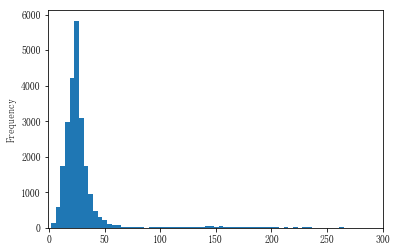

In [14]:
# 直方图
raw_data['title_len'].plot(kind = 'hist', bins = 3000, xlim = [-1,300]) 
# sns.distplot(raw_data['title_len'], bins=1000, kde=False, rug=True)

# 核密度估计图
# sns.distplot(raw_data['title_len'], hist=False, rug=True, shade=True)

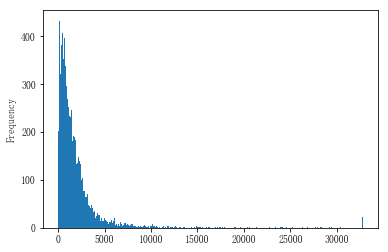

In [7]:
raw_data['content_len'].plot(kind = 'hist', bins = 1000)